# Machine Learning, DNN for regression

### Description of the dataset NO2
The dataset that we are going to use for this lesson was obtained from the StatLib repository. http://lib.stat.cmu.edu/datasets/ (NO2).
The data are a subsample of 500 observations from a data set that originate in a study where air pollution at a road is related to traffic volume and meteorological variables, collected by the Norwegian Public Roads Administration. The response variable (column 1) consist of hourly values of the logarithm of the concentration of NO2 (particles), measured at Alnabru in Oslo, Norway, between October 2001 and August 2003. The predictor variables (columns 2 to 8) are the logarithm of the number of cars per hour, temperature $2$ meters above ground (degree C), wind speed (meters/second), the temperature difference between $25$ and $2$ meters above ground (degree C), wind direction (degrees between 0 and 360), hour of day and day number from October 1 2001. Submitted by Magne Aldrin (magne.aldrin@nr.no). [28/Jul/04] (19kbytes) 


Target variable:
- NO2 concentration (log) [lno2]  

Features:    
- log of car per hour [lc] 

- temperature 2 meters above the ground (degree C)[t2] 

- wind speed (meters/seconds) [ws]

- temperature difference between 25 meters and 2 meters above the ground (degree C) [td25] 

- wind direction (degrees between 0 and 360) [wd] 

- hour of day [hd] average house occupancy

- day number from Oct. 1 2001 [dn] 

In [35]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from math import sqrt
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras import metrics

### ASSIGNING LABELS TO FEATURES
We assign the labels to the corresponding columns to have a clean representation of the dataset 


In [36]:
features = ['lc', 't2', 'ws', 'td25', 'wd', 'hd', 'dn']

### CREATE THE DNN LARGE NETWORK MODEL


<img src="images/DNN-all.png" alt="DNN Model Large" width="500"/>


#### Create the network as indicated in the image above. All activation functions should be ReLU. Have a look at the slide for hints on the code to use. 


In [21]:
def create_model_large():
    # create model
    model = Sequential()
    model.add(Dense(10, input_dim = X_train.shape[1], activation='relu'))
    model.add(Dense(30, activation= 'relu'))
    model.add(Dense(40, activation= 'relu'))
    model.add(Dense(1))
    #your code here	
    model.compile(optimizer= 'adam', loss = 'mean_squared_error', metrics = [metrics.mae])
    return model

### CREATE THE TINY ANN MODEL

#### Create an ANN with 1 layer containing 3 neurons (model tiny), alla activation functions should be ReLU.

In [22]:
def create_model_tiny():
    # create model
    model = Sequential()
    model.add(Dense(3, input_dim = X_train.shape[1], activation='relu'))
    #your code here	
    model.compile(optimizer= 'adam', loss = 'mean_squared_error', metrics = [metrics.mae])
    return model

### CREATE THE SMALL ANN MODEL

#### Create an ANN with 1 layer containing 10 neurons (model small), alla activation functions should be ReLU.

In [37]:
def create_model_small():
    # create model
    model = Sequential()
    model.add(Dense(10, input_dim=X_train.shape[1], activation= 'relu'))
    #your code here
    model.compile(optimizer= 'adam', loss = 'mean_squared_error', metrics = [metrics.mae])
    return model

### CREATE THE MEDIUM DNN MODEL

#### Create an DNN with 2 layers containing respectively 10 and 30 neurons (model medium), alla activation functions should be ReLU.


In [45]:
def create_model_medium():
    # create model
    model = Sequential()  
    model.add(Dense(10, input_dim=X_train.shape[1], activation= 'relu'))  
    model.add(Dense(30, activation= 'relu'))
    #your code here	
    model.compile(optimizer= 'adam', loss = 'mean_squared_error', metrics = [metrics.mae])
    return model

### Evaluating the model

The following functions computes the Root Mean Squared Error and the Normalized Root Mean Squared Error between the groud thruth (real) and inferred (pred) responses.  

In [46]:
def RMSE(real, pred):
    return sqrt(mean_squared_error(real, pred))

def NRMSE(real, pred):
    return sqrt(mean_squared_error(real, pred)/(real.max() - real.min()))

### Loading  the data 

#### Using the panda library to load data, provide a descriptive summary

In [47]:
# Load data
df = pd.read_csv('NO2.csv', index_col=False)

# Descriptive statistics summary
df.describe()

,lno2,lc,t2,ws,td25,wd,hd,dn
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,3.698368,6.973342,0.847400,3.056000,0.149400,143.370400,12.382000,310.474000
std,0.750597,1.087166,6.524636,1.784172,1.065237,86.510213,6.802693,200.977754
min,1.223780,4.127130,-18.600000,0.300000,-5.400000,2.000000,1.000000,32.000000
25%,3.213862,6.175842,-3.900000,1.675000,-0.200000,72.000000,6.000000,118.750000
50%,3.848020,7.425360,1.100000,2.800000,0.000000,97.000000,12.500000,212.000000
75%,4.216930,7.793175,4.900000,4.200000,0.600000,220.000000,18.000000,513.000000
max,6.395090,8.348540,21.100000,9.900000,4.300000,359.000000,24.000000,608.000000


### Visualzing the relationships among the features in the data

#### Compute and visualize a correlation matring among the features (using the seaborn library).

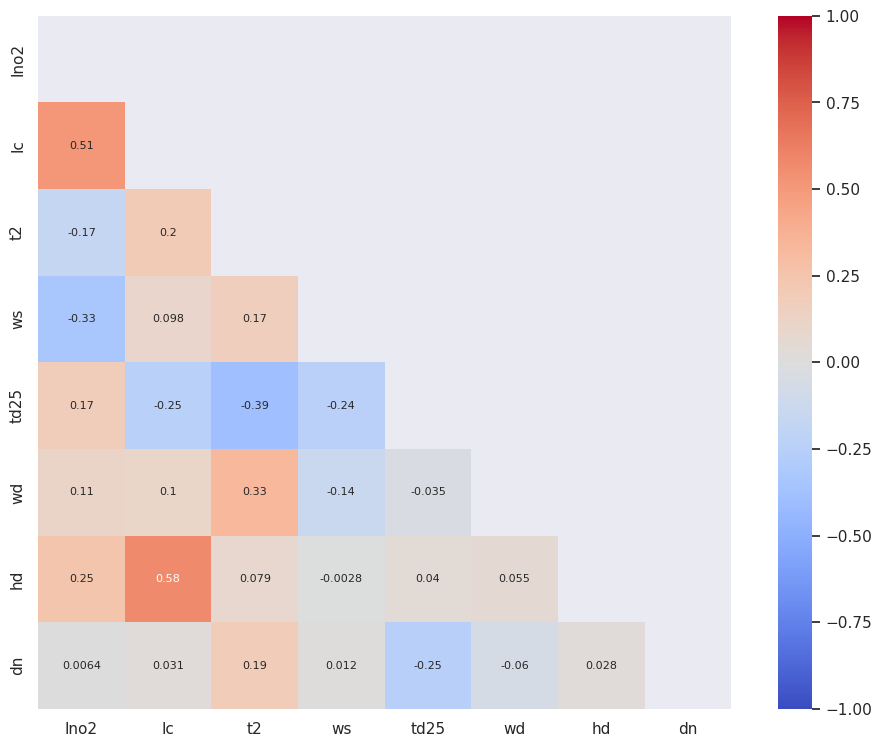

In [48]:
# Correlation matrix
corrmat = df.corr()

# Generate a mask for the upper triangle
matrix = np.triu(corrmat)
f, ax = plt.subplots(figsize=(12, 9))
sns.set(font_scale=1)
sns.heatmap(corrmat, vmin=-1, vmax=1, center= 0, square=True, annot=True, annot_kws={'size': 8}, mask=matrix, fmt='.2g', cmap= 'coolwarm')

plt.show()

### Standizing the data

#### Standardize features to have 0 mean, sigma 1 and range between -1 and 1.  Do not standardize the response.

In [49]:
# Standardizing data
sc= MinMaxScaler(feature_range=(-1,1))

for var in features:
    if(var != 'lno2'):
        df[var] = sc.fit_transform(df[var].values.reshape(-1, 1))


### Preparing the data for training, using validation set approach 

#### Remove labels and create the validation set.

In [50]:
#NumPy representation of the data frame (removing labels)
df = df.to_numpy() #df=df.values

#divide predictors from features
X = df[:, 1:8]
y = df[:, 0]

seed = 7
np.random.seed(seed)

# split dataset in 75% for traininig and 25% for testing (500 -> 375,125)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=seed)

# split training in 70% for traininig and 30% for validating (375 -> 300,75)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.30, random_state=seed)#insert your code here

# Model creation (choose between tiny, small, medium and large by using the appropriate function)
model = create_model_medium()
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 10)                80        
                                                                 
 dense_7 (Dense)             (None, 30)                330       
                                                                 
Total params: 410
Trainable params: 410
Non-trainable params: 0
_________________________________________________________________


### Fit the DNN to the data

In [30]:
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=150, batch_size=32)

Epoch 1/150
11/11 [==============================] - 0s 10ms/step - loss: 13.4196 - mean_absolute_error: 3.5449 - val_loss: 13.5155 - val_mean_absolute_error: 3.5712
Epoch 2/150
11/11 [==============================] - 0s 3ms/step - loss: 13.3680 - mean_absolute_error: 3.5352 - val_loss: 13.4719 - val_mean_absolute_error: 3.5631
Epoch 3/150
11/11 [==============================] - 0s 3ms/step - loss: 13.3169 - mean_absolute_error: 3.5256 - val_loss: 13.4275 - val_mean_absolute_error: 3.5548
Epoch 4/150
11/11 [==============================] - 0s 3ms/step - loss: 13.2663 - mean_absolute_error: 3.5161 - val_loss: 13.3810 - val_mean_absolute_error: 3.5462
Epoch 5/150
11/11 [==============================] - 0s 3ms/step - loss: 13.2127 - mean_absolute_error: 3.5061 - val_loss: 13.3339 - val_mean_absolute_error: 3.5375
Epoch 6/150
11/11 [==============================] - 0s 3ms/step - loss: 13.1595 - mean_absolute_error: 3.4962 - val_loss: 13.2868 - val_mean_absolute_error: 3.5288
Epoch 7/1

### Evaluate accuracy and loss of your model. This is how your plots should look like:
<table><tr>
<td> <img src="images/accuracy.png" style="width: 500px;"/> </td>
<td> <img src="images/loss.png" style="width: 500px;"/> </td>
</tr></table>

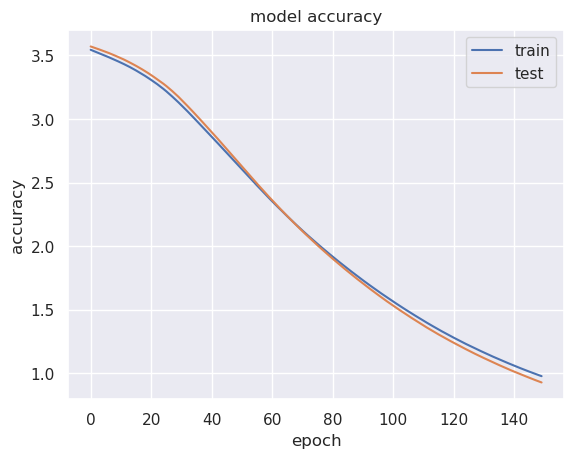

In [51]:
# Summarize history for accuracy
plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

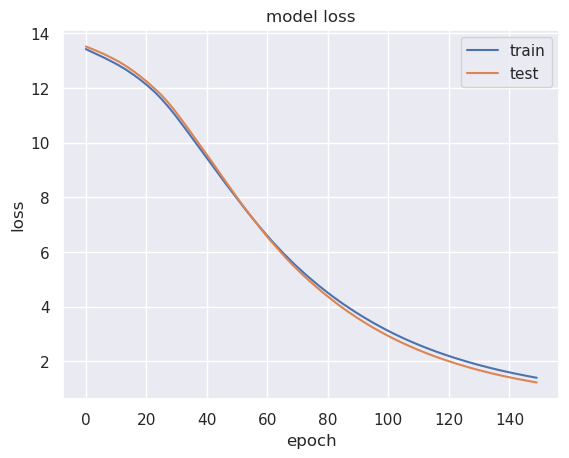

In [32]:
# Summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

### Now evaluate the predictions of your model in terms of RMSE and NRMSE. You should obtain plots like these:
<table><tr>
<td> <img src="images/inference.png" style="width: 500px;"/> </td>
<td> <img src="images/inference_diff.png" style="width: 500px;"/> </td>
</tr></table>

In [33]:
# Prediction
pred = model.predict(X_test).reshape(1,-1)[0]

rmse = RMSE(y_test, pred)
nrmse = NRMSE(y_test, pred)


print("rmse : ",rmse,"  nrmse : ",nrmse)

4/4 [==============================] - 0s 1ms/step


ValueError: Found input variables with inconsistent numbers of samples: [125, 375]

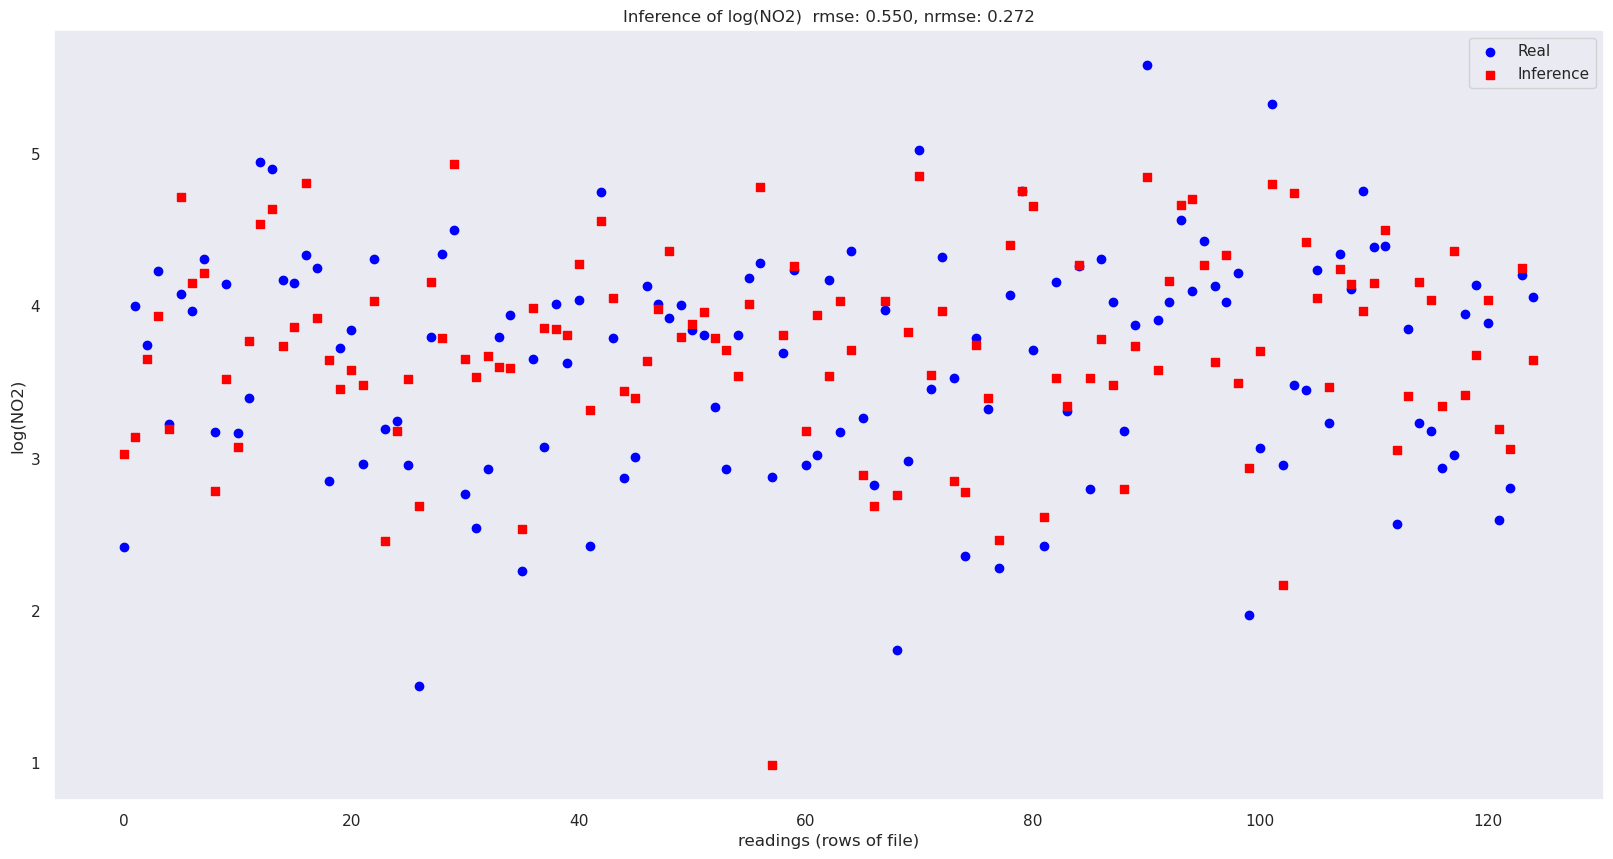

In [ ]:
my_x=np.arange(0,len(X_test[:,0]),1)

fig = plt.figure(figsize=(20,10))
plt.scatter(my_x, y_test, label='Real', color='blue', marker='o')
plt.scatter(my_x, pred, label='Inference', color='red', marker='s')
plt.title(f'Inference of log(NO2)  rmse: {rmse:.3f}, nrmse: {nrmse:.3f}')
plt.ylabel('log(NO2)')
plt.xlabel('readings (rows of file)')
plt.grid()
plt.legend()
plt.show()

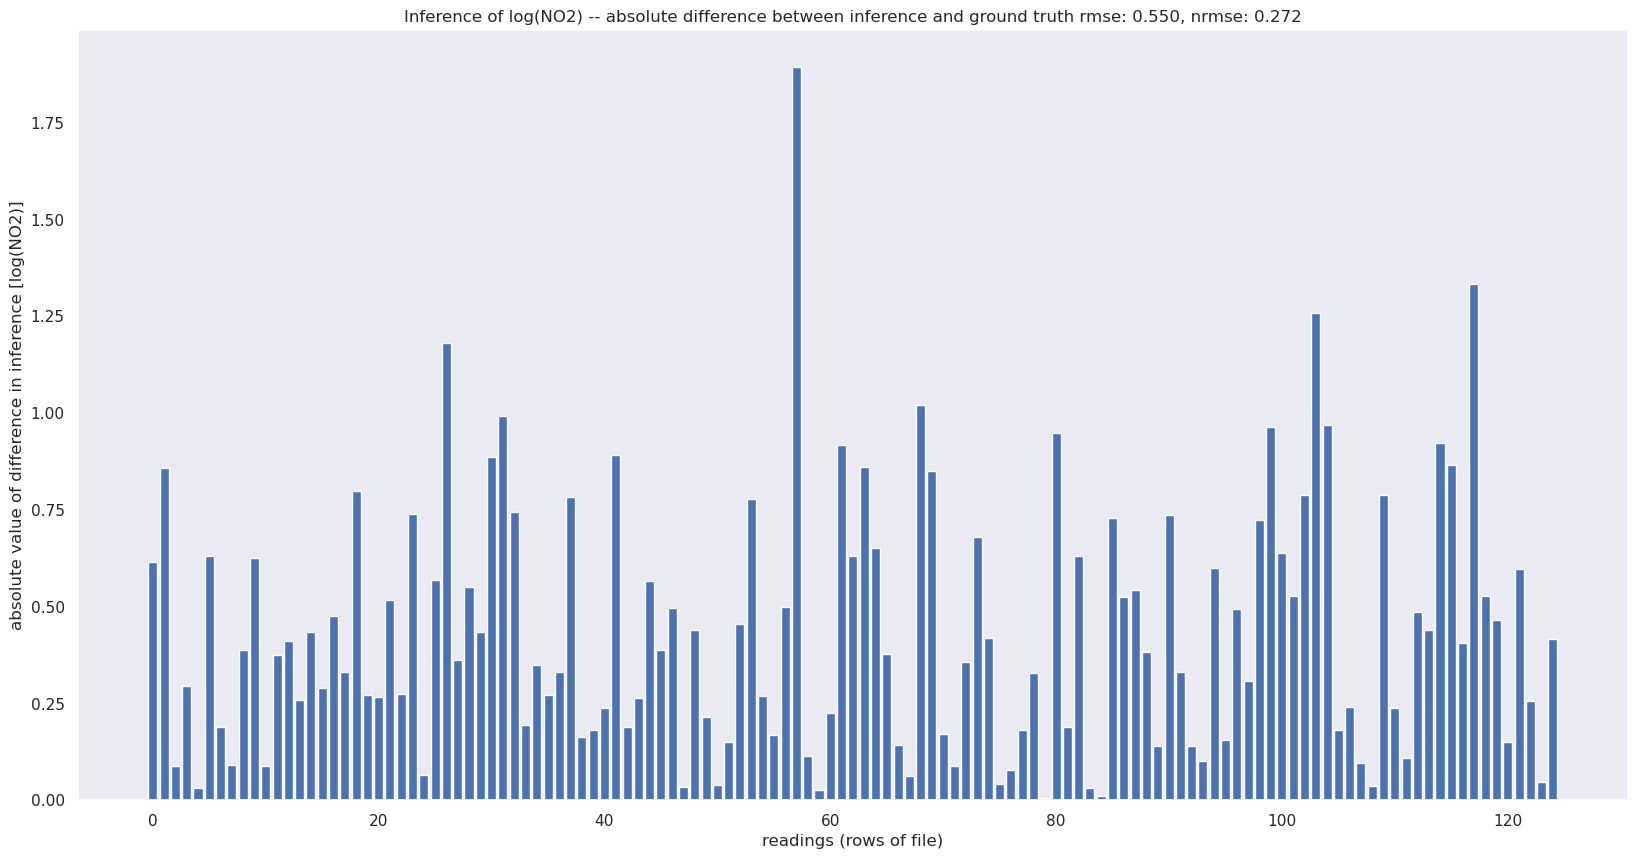

In [ ]:
fig = plt.figure(figsize=(20,10))
my_d = abs(y_test-pred)

plt.bar(my_x,my_d)
plt.title(f'Inference of log(NO2) -- absolute difference between inference and ground truth rmse: {rmse:.3f}, nrmse: {nrmse:.3f}')
plt.ylabel('absolute value of difference in inference [log(NO2)]')
plt.xlabel('readings (rows of file)')
plt.grid()
plt.show()